In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import cgs as cgs
from scipy import interpolate
import dwarf_model as dw_model
from initial_conditions import ic_list as icl ;
from matplotlib import rc

rc('text',usetex=True)
rc('font',size=17)

In [8]:
carina = icl.ic_object_dict['CarinaMidMed']

carina_orbit = np.genfromtxt("./../orbits/carina_orbit_tab.dat")
t_orbit = carina_orbit[:,0] * cgs.Myr
v_orbit = carina_orbit[:,2] * 1.0E5
rho_halo = carina.ic['n_halo'] * cgs.mp * carina.ic['mu_halo']


In [13]:
anal_carina = dw_model.analytical_dwarf('CarinaMidMed',carina.ic)
anal_carina.setup_orbit(t_orbit,rho_halo,v_orbit)
t = np.linspace(0.0,np.max(t_orbit)/cgs.Myr,1000.0)*cgs.Myr
M_tot,R_tot = anal_carina.evolve(t, ['RPS','KH'])
M_RPS,R_RPS = anal_carina.evolve(t, ['RPS'])
M_KH ,R_KH  = anal_carina.evolve(t, ['KH'])

In [14]:
fpath="/home/emerick/Research/dwarfs/flash_runs/"
carina_data = np.genfromtxt('./../plot/CarMedMidMass.dat',names=True)
adiabatic = np.genfromtxt(fpath + "carina_adiabatic/mass_evolution_0-300.dat",names=True)
nosne = np.genfromtxt(fpath + "carina_final/lowres_nosne/carina_nosne_bound_mass_0-750Myr_dt10.dat",names=True)
sne = np.genfromtxt(fpath + "carina_final/lowres/carina_nosne_mass_dt5Myr.dat",names=True)


labels = ['Gatto','No SNe', 'Adiabatic','SNe']
mass_array = [carina_data['M']*1.0E4, adiabatic['m'], nosne['m'],sne['m']]
time_array = [carina_data['t']*10.0, adiabatic['t'], nosne['t'],sne['t']]
colors = ['red','blue','blue','blue']
ls= ['-','--','-.','-']

(0, 1)

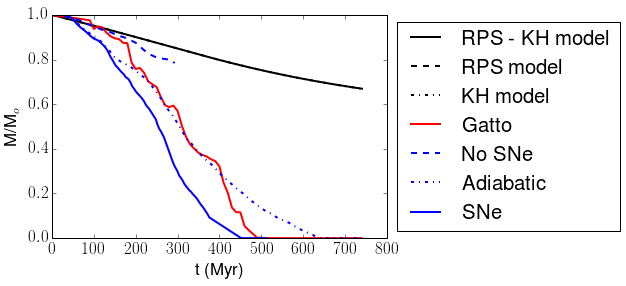

In [15]:
plt.plot(t /cgs.Myr,M_tot/M_tot[0],label='RPS - KH model', lw=2, ls='-', color='black')
plt.plot(t /cgs.Myr,M_RPS/M_RPS[0],label='RPS model', lw=2,ls='--',color='black')
plt.plot(t /cgs.Myr,M_KH /M_KH[0] ,label='KH model',  lw=2,ls='-.',color='black')

for i in np.arange(np.size(labels)):
    plt.plot(time_array[i], mass_array[i]/mass_array[i][0], label=labels[i], ls=ls[i],color=colors[i],lw=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r't (Myr)')
plt.ylabel(r'M/M$_{o}$')
plt.ylim(0,1)

(0, 1)

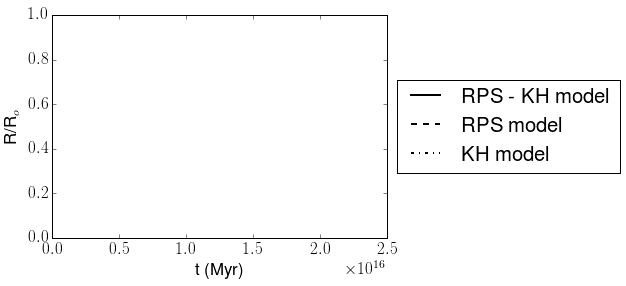

In [12]:
plt.plot(t /cgs.Myr,R_tot/R_tot[0],label='RPS - KH model', lw=2, ls='-', color='black')
plt.plot(t /cgs.Myr,R_RPS/R_RPS[0],label='RPS model', lw=2,ls='--',color='black')
plt.plot(t /cgs.Myr,R_KH /R_KH[0] ,label='KH model',  lw=2,ls='-.',color='black')

#for i in np.arange(np.size(labels)):
#    plt.plot(time_array[i], mass_array[i]/mass_array[i][0], label=labels[i], ls=ls[i],color=colors[i],lw=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r't (Myr)')
plt.ylabel(r'R/R$_{o}$')
plt.ylim(0,1)